In [43]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [44]:
data=pd.read_csv('salary.csv')
df=pd.DataFrame(data)
df

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [45]:
df2=df.drop([4,5, 9, 15,11,13,17,21])
df2

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
10,12,Anik,26.0,HongKong,Asia,66672.0
12,14,Geet,22.0,HongKong,Asia,30007.0
14,16,Ram,38.0,Hyderabad,Asia,54666.0


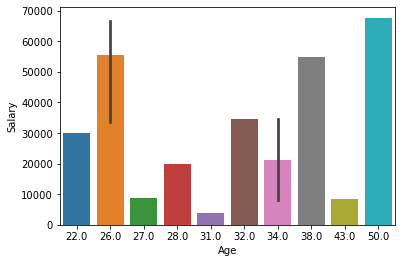

In [46]:
sns.barplot(x=df2["Age"],y=df2["Salary"],data=df2)
plt.show()

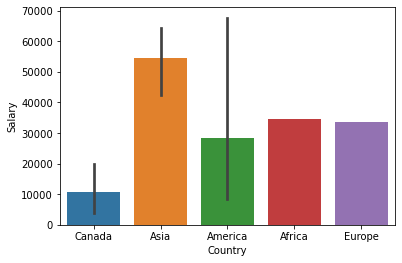

In [47]:
sns.barplot(x=df2["Country"],y=df2["Salary"],data=df2)
plt.show()

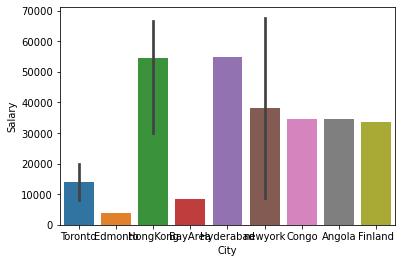

In [48]:
sns.barplot(x=df2["City"],y=df2["Salary"],data=df2)
plt.show()

In [49]:
x=df2[["Age"]]
y=df2[["Salary"]]

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.60618972],
       [-0.20206324],
       [ 0.20206324],
       [-0.87560737],
       [ 1.41444268],
       [ 0.74089855],
       [ 2.35740446],
       [-0.87560737],
       [-1.41444268],
       [ 0.74089855],
       [-0.74089855],
       [ 0.20206324],
       [-0.06735441],
       [-0.87560737]])

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train ,y_train)
    y_pred =regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_Score corresponding to random state: ", r_state, "is:", r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to: ", final_r_state, "is", max_r_score)
    

r2_Score corresponding to random state:  42 is: 0.14267669397310123
r2_Score corresponding to random state:  43 is: -0.1874940085926995
r2_Score corresponding to random state:  44 is: -5.826357772185025
r2_Score corresponding to random state:  45 is: -5.826357772185026
r2_Score corresponding to random state:  46 is: -0.39504410224129516
r2_Score corresponding to random state:  47 is: -1.113286321581993
r2_Score corresponding to random state:  48 is: -0.3412719488331162
r2_Score corresponding to random state:  49 is: -0.39514946268180995
r2_Score corresponding to random state:  50 is: 0.053747000870824624
r2_Score corresponding to random state:  51 is: -0.3107125447686543
r2_Score corresponding to random state:  52 is: -0.03606161863000534
r2_Score corresponding to random state:  53 is: -5.338321583594553
r2_Score corresponding to random state:  54 is: -0.5193711107503938
r2_Score corresponding to random state:  55 is: -6.144412877870026
r2_Score corresponding to random state:  56 is: 0

In [61]:
#Saving the model

import joblib

#saving model as pickle in a file
joblib.dump(regr,'salary.pkl')

['salary.pkl']